# 다양한 머신러닝 기법

데이터 생성

In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')


train_df = df[:800]
test_df = df[800:]

names = train_df.columns
train_df = train_df.drop(names[4:], axis=1)
test_df = test_df.drop(names[4:], axis=1)

train_df.fillna(train_df.mean()[['age']], inplace=True)
test_df.fillna(test_df.mean()[['age']], inplace=True)

map_dict = {'female': 0, 'male': 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

def function1(x):
  if x < 20:
    return 1
  elif x < 40:
    return 2
  elif x < 60:
    return 3
  else:
    return 4

train_df['age'] = train_df['age'].apply(function1)
test_df['age'] = test_df['age'].apply(function1)

X_train = train_df.drop(['survived'], axis=1)
Y_train = train_df['survived']
X_test = test_df.drop(['survived'], axis=1)
Y_test = test_df['survived']

<ipython-input-1-b1e6007c98b3>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.fillna(train_df.mean()[['age']], inplace=True)
<ipython-input-1-b1e6007c98b3>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.fillna(test_df.mean()[['age']], inplace=True)


### 결정나무

In [2]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


### 배깅(랜덤 포레스트)
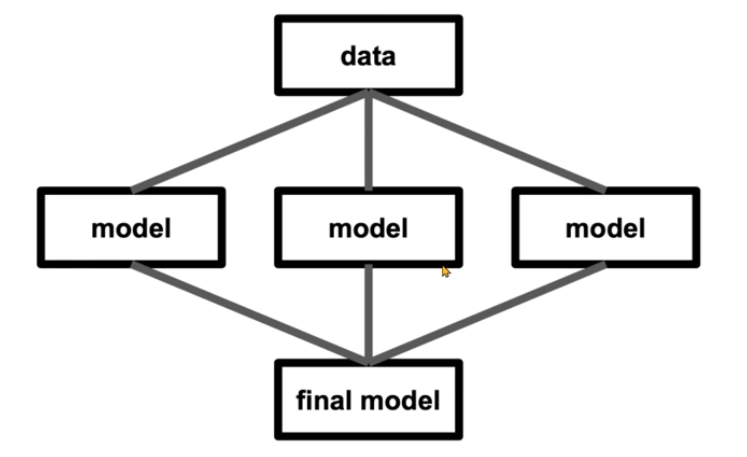

랜덤하게 데이터를 샘플링해 여러 모델을 생성해본 뒤 평균을 낸다든 지 하는 방식으로 최종 모델을 만드는 방식

In [4]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)   # n_estimators = 모델의 개수
random_forest.fit(X_train, Y_train)
print(random_forest.score(X_train, Y_train))
print(random_forest.score(X_test, Y_test))

0.8
0.7912087912087912


### 부스팅(xgboost)

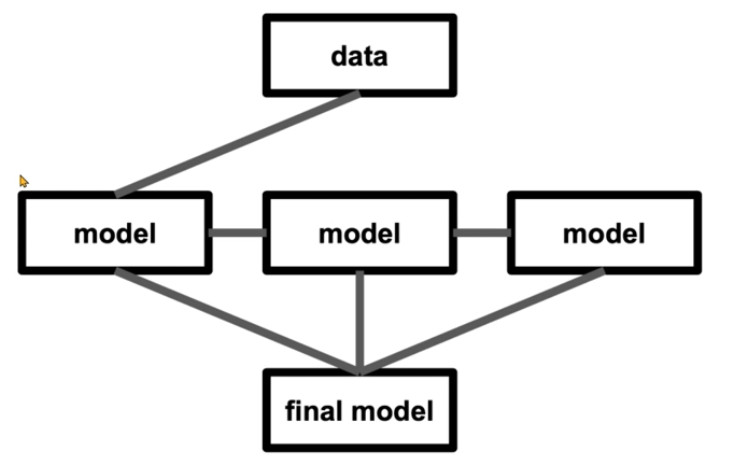

부스팅은 데이터를 가지고 특정 모델을 만든 후 해당 모델의 취약점을(특정 데이터에 쏠린다던지 특정 데이터에 정확도가 낮다든지 등) 보완할 수 있는 다른 모델을 생성해나가는 기법

In [6]:
import xgboost as xgb
boosting_model = xgb.XGBClassifier(n_estimators=100)
boosting_model.fit(X_train, Y_train)

print(boosting_model.score(X_train, Y_train))
print(boosting_model.score(X_test, Y_test))

0.8
0.7802197802197802


# 딥러닝

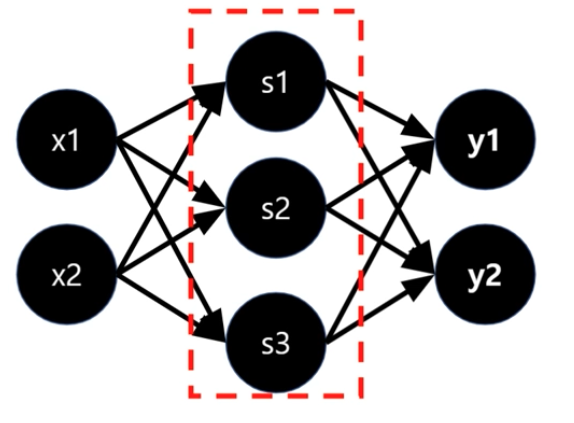

x: input data  
y: output data  
s: hidden_layer

이전 노드의 값과 화살표의 weight 값을 곱한 것들을 합한 값을 다음 노드로 전달

시계열 예측
- 예측된 결과값을 그대로 x값 뒤에 이어붙이는 방법
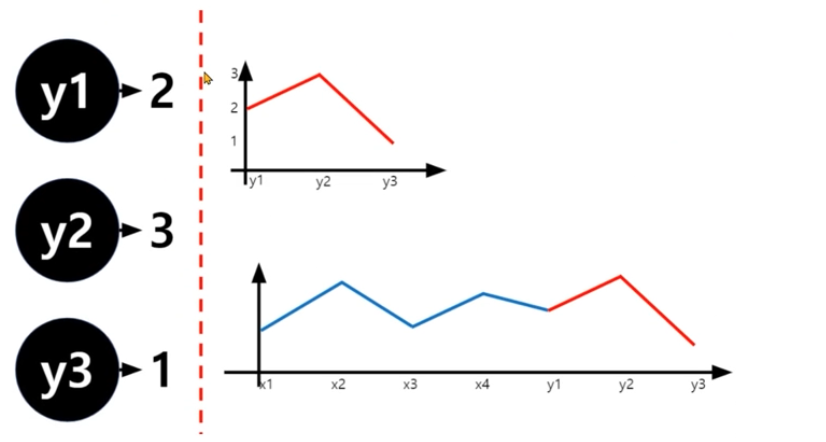

결과값을 통한 분류
- 결과 값이 가장 큰 클래스로 해당 input을 분류  
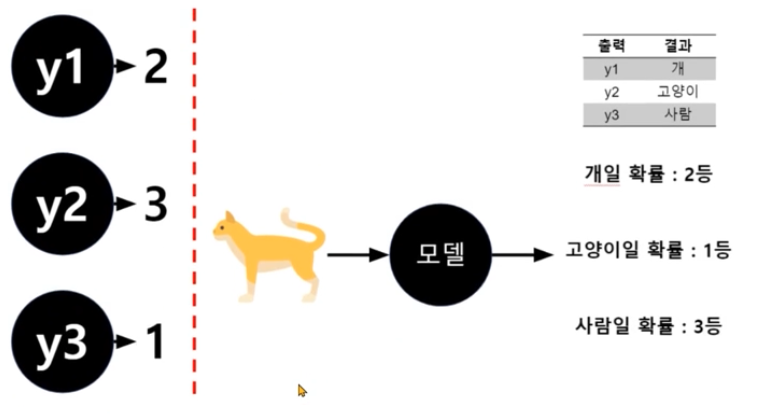